In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


Paso 1: Cargar y preparar los datos
Primero, cargaremos los datos y crearemos una columna para el AQI basada en el nivel de ozono:

In [3]:
# Generamos un DataFrame llamado 'df' con los datos de calidad del aire
df = pd.read_csv('/workspaces/DATASCIENCE/CEIABD_REPO/CEIABD_MODULOS_IA/MODELOS DE INTELIGENCIA ARTIFICIAL/NOTEBOOKS DEL AULA/datasets/airquality.csv')
df.head()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value,lat,lng
0,51,1,36,0,51,44.7444,44.2031
1,41,1,5,1,41,-5.2900,-44.4900
2,41,1,5,1,41,-11.2958,-41.9869
3,66,1,39,2,66,37.1667,15.1833
4,34,1,34,0,20,53.0167,20.8833


In [4]:


# Crear una función para clasificar el AQI basado en el nivel de ozono
def classify_aqi(ozone):
    if ozone <= 50:
        return 'BUENO'
    elif ozone <= 100:
        return 'MODERADO'
    elif ozone <= 150:
        return 'CONTAMINADO'
    elif ozone <= 200:
        return 'INSANO'
    else:
        return 'PELIGROSO'

# Aplicar la función de clasificación a la columna de ozono
df['AQI_Category'] = df['Ozone AQI Value'].apply(classify_aqi)


Paso 2: Visualizar la distribución de las categorías AQI

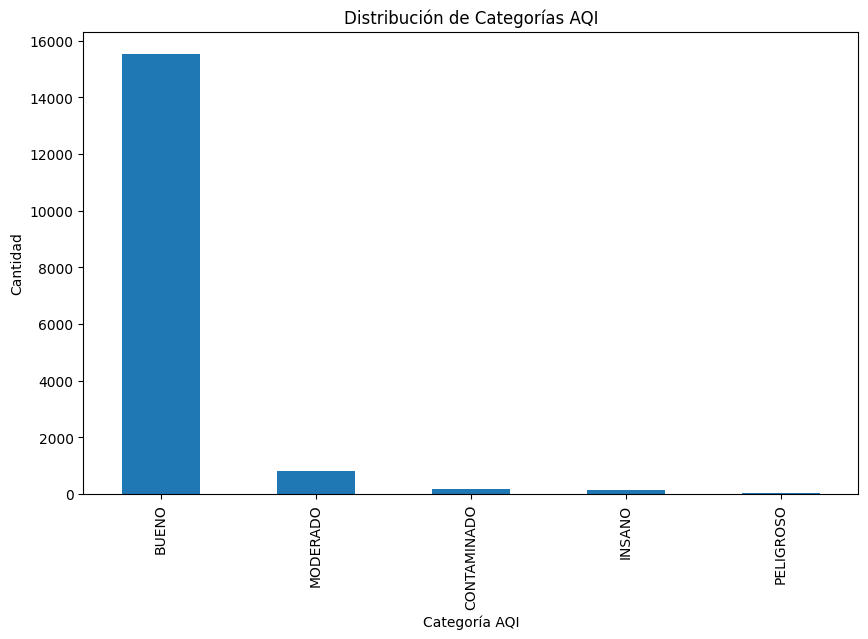

In [5]:
plt.figure(figsize=(10, 6))
df['AQI_Category'].value_counts().plot(kind='bar')
plt.title('Distribución de Categorías AQI')
plt.xlabel('Categoría AQI')
plt.ylabel('Cantidad')
plt.show()


Paso 3: Preparar los datos para el modelo

In [8]:
# Seleccionar las características y la variable objetivo
X = df[['Ozone AQI Value', 'CO AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value', 'lat', 'lng']]
y = df['AQI_Category']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Paso 4: Entrenar el modelo de árbol de decisión

In [9]:
# Crear y entrenar el modelo
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Paso 5: Evaluar el modelo

In [10]:
# Hacer predicciones en el conjunto de prueba
y_pred = dt_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# Imprimir el informe de clasificación
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Precisión del modelo: 1.00

Informe de clasificación:
              precision    recall  f1-score   support

       BUENO       1.00      1.00      1.00      3128
 CONTAMINADO       1.00      1.00      1.00        30
      INSANO       1.00      1.00      1.00        28
    MODERADO       1.00      1.00      1.00       150
   PELIGROSO       1.00      1.00      1.00         3

    accuracy                           1.00      3339
   macro avg       1.00      1.00      1.00      3339
weighted avg       1.00      1.00      1.00      3339



Paso 6: Visualizar el árbol de decisión

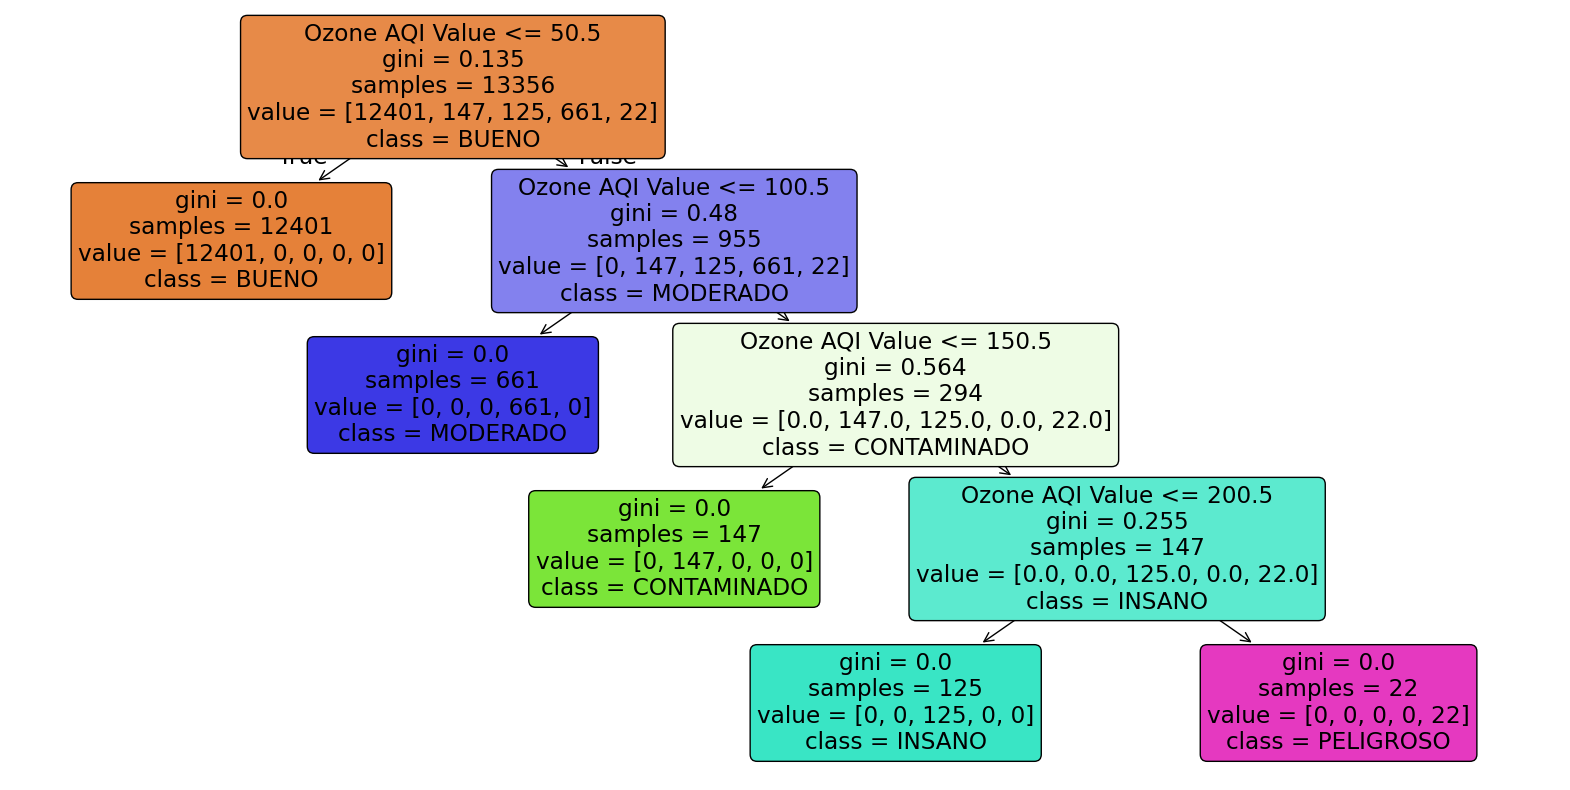

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(dt_classifier, feature_names=X.columns, class_names=dt_classifier.classes_, filled=True, rounded=True)
plt.show()


Paso 7: Analizar la importancia de las características

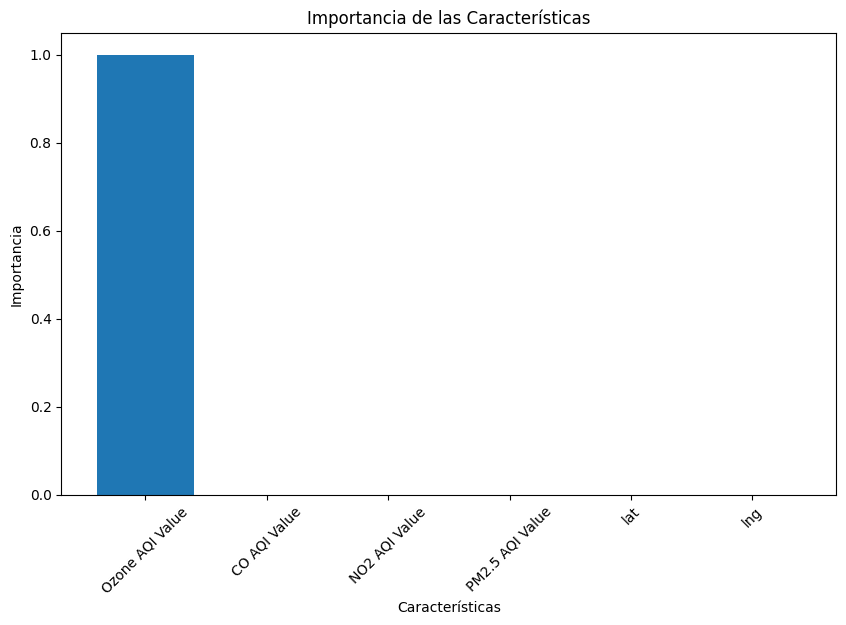

In [12]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_classifier.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Importancia de las Características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.xticks(rotation=45)
plt.show()


 # SISTEMA BASADO EN REGLAS
 ## Clasificación de la Calidad del Aire (Ozono y PM2.5)

### Importamos librerías

In [21]:

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Definición de las Reglas
Se definen las reglas para la clasificación de la calidad del aire basadas en los niveles de ozono y PM2.5.

In [22]:
# Reglas para el Ozono
ozone_rules = {
    "BUENO": (0, 50),
    "MODERADO": (51, 100),
    "CONTAMINADO": (101, 150),
    "INSANO": (151, 200),
    "PELIGROSO": (201, float('inf'))
}

# Reglas para PM2.5
pm25_rules = {
    "BUENO": (0, 12),
    "MODERADO": (12.1, 35.4),
    "CONTAMINADO": (35.5, 55.4),
    "INSANO": (55.5, 150.4),
    "PELIGROSO": (150.5, float('inf'))
}

## Creación de Datos de Ejemplo
Para demostrar el sistema, se crea un DataFrame con datos de ejemplo de niveles de ozono y PM2.5.

In [23]:
data = pd.DataFrame({
    'ozone': [25, 75, 120, 180, 250, 50, 100, 150, 200],
    'pm25': [10, 30, 40, 60, 200, 35, 55, 150, 12]
})

## Función de Clasificación 
Se define una función para clasificar la calidad del aire basándose en las reglas definidas.

In [25]:
def classify_air_quality(row):
    ozone_level = row['ozone']
    pm25_level = row['pm25']
    
    ozone_category = None
    pm25_category = None

    # Clasificación del Ozono
    for category, (lower, upper) in ozone_rules.items():
        if lower <= ozone_level <= upper:
            ozone_category = category
            break

    # Clasificación del PM2.5
    for category, (lower, upper) in pm25_rules.items():
        if lower <= pm25_level <= upper:
            pm25_category = category
            break
    
    # Determinar la categoría final (la peor de las dos)
    categories = ["BUENO", "MODERADO", "CONTAMINADO", "INSANO", "PELIGROSO"]

    if ozone_category and pm25_category:
        max_category = max(categories.index(ozone_category), categories.index(pm25_category))
        return categories[max_category]
    elif ozone_category:
        return ozone_category
    else:
        return pm25_category

## Aplicación de la Función de Clasificación
Se aplica la función a cada fila del DataFrame para obtener la calidad del aire correspondiente.

In [26]:

data['air_quality'] = data.apply(classify_air_quality, axis=1)

## Visualización de los Resultados
Se muestran los datos con la clasificación de la calidad del aire.

In [27]:
print(data)

   ozone  pm25  air_quality
0     25    10        BUENO
1     75    30     MODERADO
2    120    40  CONTAMINADO
3    180    60       INSANO
4    250   200    PELIGROSO
5     50    35     MODERADO
6    100    55  CONTAMINADO
7    150   150       INSANO
8    200    12       INSANO


## Gráfico de la Calidad del Aire
Gráfico para visualizar la distribución de las categorías de calidad del aire.

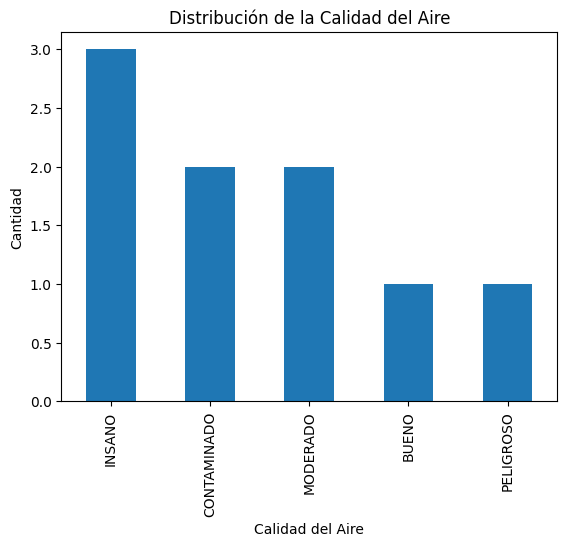

In [28]:
data['air_quality'].value_counts().plot(kind='bar', title='Distribución de la Calidad del Aire')
plt.xlabel('Calidad del Aire')
plt.ylabel('Cantidad')
plt.show()
